<a href="https://colab.research.google.com/github/yurystepanets/ds_find_number/blob/main/SGA_unit6_NBC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Классификация текстов с использованием Наивного Байесовского Классификатора

## Задание 1 (1 балл)

Откройте данные. Узнайте, сколько в них спам- и не спам-писем. Визуализируйте полученные соотношение подходящим образом.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/BestPractices/MATHML-2. NativeBayesClasiffier/spam_or_not_spam.csv', sep=',')
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,email,label
0,date wed NUMBER aug NUMBER NUMBER NUMBER NUMB...,0
1,martin a posted tassos papadopoulos the greek ...,0
2,man threatens explosion in moscow thursday aug...,0
3,klez the virus that won t die already the most...,0
4,in adding cream to spaghetti carbonara which ...,0


In [ ]:
# рассчитайте частоты для классов : ваш код здесь
df_classes = df['label'].value_counts()
df_classes

0    2500
1     500
Name: label, dtype: int64

<Axes: xlabel='label'>

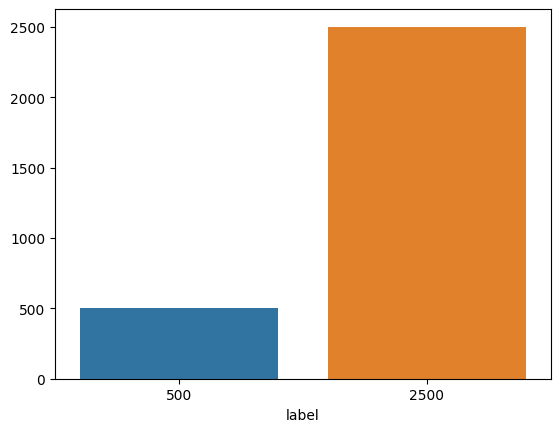

In [ ]:
# визуализируйте результат: ваш код здесь
sns.barplot(data=df_classes, x=df_classes.index, y=df_classes.values)

## Задание 2 (2 балла)

Вам необходимо предобработать ваши данные и перевести их в векторный вид. Подгрузим необходимый модуль:

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

Замените в данных все пустые строки и строки, состоящие из пробелов, на пропуски (NaN). После этого удалите из данных все строки, в которых наблюдаются пропущенные значения.

In [ ]:
# clean up string from spaces
def cleanUp(s: str):
  s = str(s)
  if s.count(" ") == len(s):
    s = s.replace(" ", "")
  if s=="":
    return np.nan
  return s

# apply cleanUp function to emails
df['email'] = df['email'].apply(cleanUp)
#delete Nan
df.dropna(axis=0, inplace=True)
df.isna()['email'].value_counts()

False    2998
Name: email, dtype: int64

Переводим данные в векторный вид:

In [ ]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df["email"])


Определите, сколько теперь признаков в нашем наборе данных:

In [ ]:
X.shape

(2998, 34117)

## Задание 3 (2 балла)

Определите целевую переменную и признаки:

In [ ]:
X=X
y=df['label']

Разделите выборку на обучающую и тестовую, используя стратифицированное разбиение (параметр `stratify` установите в значение вектора ответов y) размер тестовой выборки (`test_size`) возьмите как 0.25, параметр `random_state` определите со значением 42:

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.75, test_size=0.25, random_state=42, stratify=y)

Рассчитайте среднее значение целевой переменной по тестовой выборке:

In [ ]:
val = round(y_test.mean(),3)
print(f'Cреднее значение целевой переменной по тестовой выборке: {val}')

Cреднее значение целевой переменной по тестовой выборке: 0.167


## Задание 4 (3 балла)

Определите и обучите подходящий алгоритм с параметром alpha = 0.01

In [ ]:
#ваш код здесь

Оцените результат с точки зрения всех известных вам метрик (не менее трёх):

In [ ]:
#ваш код здесь

Нарисуйте ROC-кривую:

In [ ]:
#ваш код здесь

## Задание 5 (3 балла)

Переберите несколько значений alpha с помощью кросс-валидации. Оцените, зависит ли от этого параметра качество классификации.

In [ ]:
#ваш код здесь